# **Webscraping the Questions & Tags from `Stack exchange`**


Here, our ultimate goal is to scrape the Questions & Tags for the webpage Stack Echange of Astronomy category webpage for all the respective pages.

### Importing essential libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import re
from wordcloud import WordCloud 



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import requests
from requests import get
import warnings
warnings.filterwarnings("ignore")
from requests import get
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.util import *
from nltk.corpus import stopwords
import re
import seaborn as sns
from collections import defaultdict

### Required Pages for Web Scraping:
https://astronomy.stackexchange.com/questions?tab=newest&pagesize=50  
https://astronomy.stackexchange.com/questions?tab=newest&page=2  
:  
:  
:  
:  
:  
https://astronomy.stackexchange.com/questions?tab=newest&page=196  

### creating a list to store the links of all the required pages 

In [5]:
pages_list=[]                         # Empty list that will be appended with the page count

pages_list.append("https://astronomy.stackexchange.com/questions?tab=newest&pagesize=50")

for page in list(range(2, 197)):     # Looping over first 196 webpages

  pages_list.append('https://astronomy.stackexchange.com/questions?tab=newest&page='+str(page))
  
#pages_list  
print(len(pages_list))

196


# **Webscraping Questions**

In [6]:
questions_list=[]                     # Creating an empty list of questions that will be appended with the question counts.

for x in pages_list:                  # Looping over all the pages in the page list
  page = requests.get(x)
  soup = BeautifulSoup(page.text, 'html.parser')

  question_name = soup.find_all('h3')   # Finding the h3 tag that has details of the question
  for question in question_name:
        if question.find('a'):
            questions_list.append(question.find('a').text)

In [8]:
questions_list[:5]

['current community',
 'more stack exchange communities',
 'How to calculate the distance between 2 galaxies given RA, DEC and light years from Earth [duplicate]',
 'Could not slow neutrinos orbit galaxies and clusters, thus comprising a large component of even COLD dark matter?',
 "Are ocean water planets at Mars' atmospheric pressure possible?"]

### As we can in the above output, the `question_list` also contains some unwanted rows which are not the questions i.e. `current community` and `more stack exchange communities`. Hence, we'll remove these rows.

In [9]:
a = ['current community', 'more stack exchange communities']

In [10]:
df1 = pd.DataFrame(questions_list, columns =['Questions']) 

In [11]:
df1.head()

,Questions
0,current community
1,more stack exchange communities
2,How to calculate the distance between 2 galaxi...
3,Could not slow neutrinos orbit galaxies and cl...
4,Are ocean water planets at Mars' atmospheric p...


In [12]:
df1 = df1[~df1['Questions'].isin(a)]

In [13]:
df1.head()

,Questions
2,How to calculate the distance between 2 galaxi...
3,Could not slow neutrinos orbit galaxies and cl...
4,Are ocean water planets at Mars' atmospheric p...
5,Unit problem regards to proton
6,Throwing a baseball from orbit to the earth


In [14]:
print(len(df1))

9800


# **Webscraping Tags**

In [15]:
def ListToString(string):
  # initialize an empty string 
  string1 = ""
    
  # traverse in the string   
  for element in string:  
      string1 = string1 + element   
     
  return string1

# To get the tags from the webpage
tag=[]

for x in pages_list:
  page = requests.get(x)
  soup = BeautifulSoup(page.text, 'html.parser')

  tags=[]

  for div in soup.find_all('div', {"class": re.compile("^tags")}):      
    tags.append(div.get('class')[1:])

  clean_tags=[]

  for i in tags:
    clean_tags.append(ListToString(i).replace('t-','|'))

  for j in clean_tags:
    tag.append(j[1:])

In [16]:
print(len(tag))
print(tag[:11])

9800
['observational-astronomy|astrophysics|distances', 'dark-matter|neutrinos', 'planet|water|planetary-science', 'astrophysics|units', 'orbit|orbital-mechanics|satellite', 'star-formation', 'positional-astronomy', 'celestial-mechanics|skyfield', 'telescope|apparen|magnitude', 'europa', 'planet|solar-system|positional-astronomy|planetary-systems|alignment']


In [17]:
print(tag[0])
print(tag[-1])

observational-astronomy|astrophysics|distances
distances


### **Storing the `tag` list in `df` dataframe**

In [18]:
df1['Tags']=tag

In [19]:
df1.head()

,Questions,Tags
2,How to calculate the distance between 2 galaxi...,observational-astronomy|astrophysics|distances
3,Could not slow neutrinos orbit galaxies and cl...,dark-matter|neutrinos
4,Are ocean water planets at Mars' atmospheric p...,planet|water|planetary-science
5,Unit problem regards to proton,astrophysics|units
6,Throwing a baseball from orbit to the earth,orbit|orbital-mechanics|satellite


In [20]:
df1.tail()

,Questions,Tags
10187,Parking a telescope at a Lagrange point: is th...,gravity|space-telescope|lagrange-point|space-d...
10188,Can small gas planets exist?,planet|gas-giants
10189,Has Hawking Radiation Ever Been Observed?,black-hole|observational-astronomy|hawking-rad...
10190,What is the current accepted theory as to why ...,core|mercury|density
10191,Why has Moving Cluster Method been successful ...,distances


In [21]:
len(df1)

9800

# **Data Analysis**

# Wordcloud for `Tags`

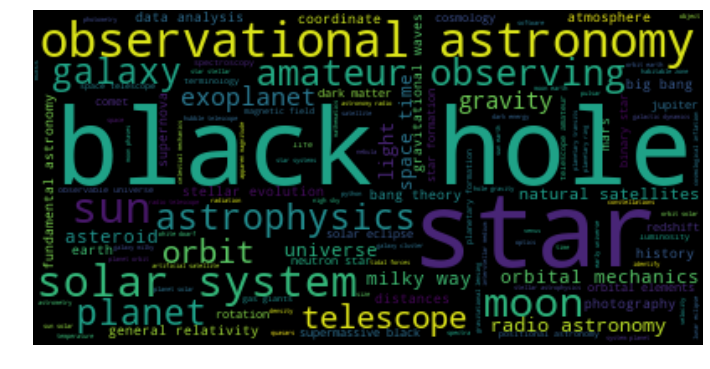

In [22]:
# get a list of the words in all Types, initialise a dictionary to zero values for each word
vocab = []
for Tag in df1['Tags']:
    vocab.append(Tag)

vocab=', '.join(vocab)
#print(vocab)


# Start with one review:
text = vocab

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.subplots(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Wordcloud for `Questions`

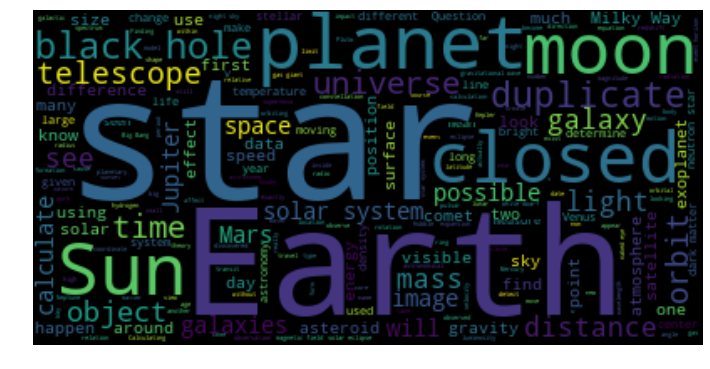

In [23]:
# get a list of the words in all Types, initialise a dictionary to zero values for each word
vocab = []
for Question in df1['Questions']:
    vocab.append(Question)

vocab=', '.join(vocab)
#print(vocab)






# Start with one review:
text = vocab

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.subplots(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# n-grams (uni, bi, & tri) analysis

In [24]:
# Creating a func() called build_ngrams to analyse data in the form of unigrams, bigrams, ngrams etc.

def build_ngrams(clean_text, ngram):
    clean_text = clean_text.lower()
    clean_text = remove_space.sub(' ', clean_text)
    clean_text = bad_symbols.sub(' ', clean_text)
    clean_text = ' '.join(word for word in clean_text.split() if word not in STOPWORDS) 
    tokenize = nltk.word_tokenize(clean_text)
    return list(ngrams(tokenize, ngram))

In [25]:
# Handling spaces in text and bad symbols and eliminating those using regex.

remove_space = re.compile('[/(){}\[\]\|@,;]')
bad_symbols = re.compile('[^a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

In [30]:
# Looping over questions list and building unigrams from the list.

onegram_tags_freq = defaultdict(int)
for sentence in df1['Questions']:
    for word in build_ngrams(sentence, 1):
        onegram_tags_freq[word] = onegram_tags_freq[word] + 1

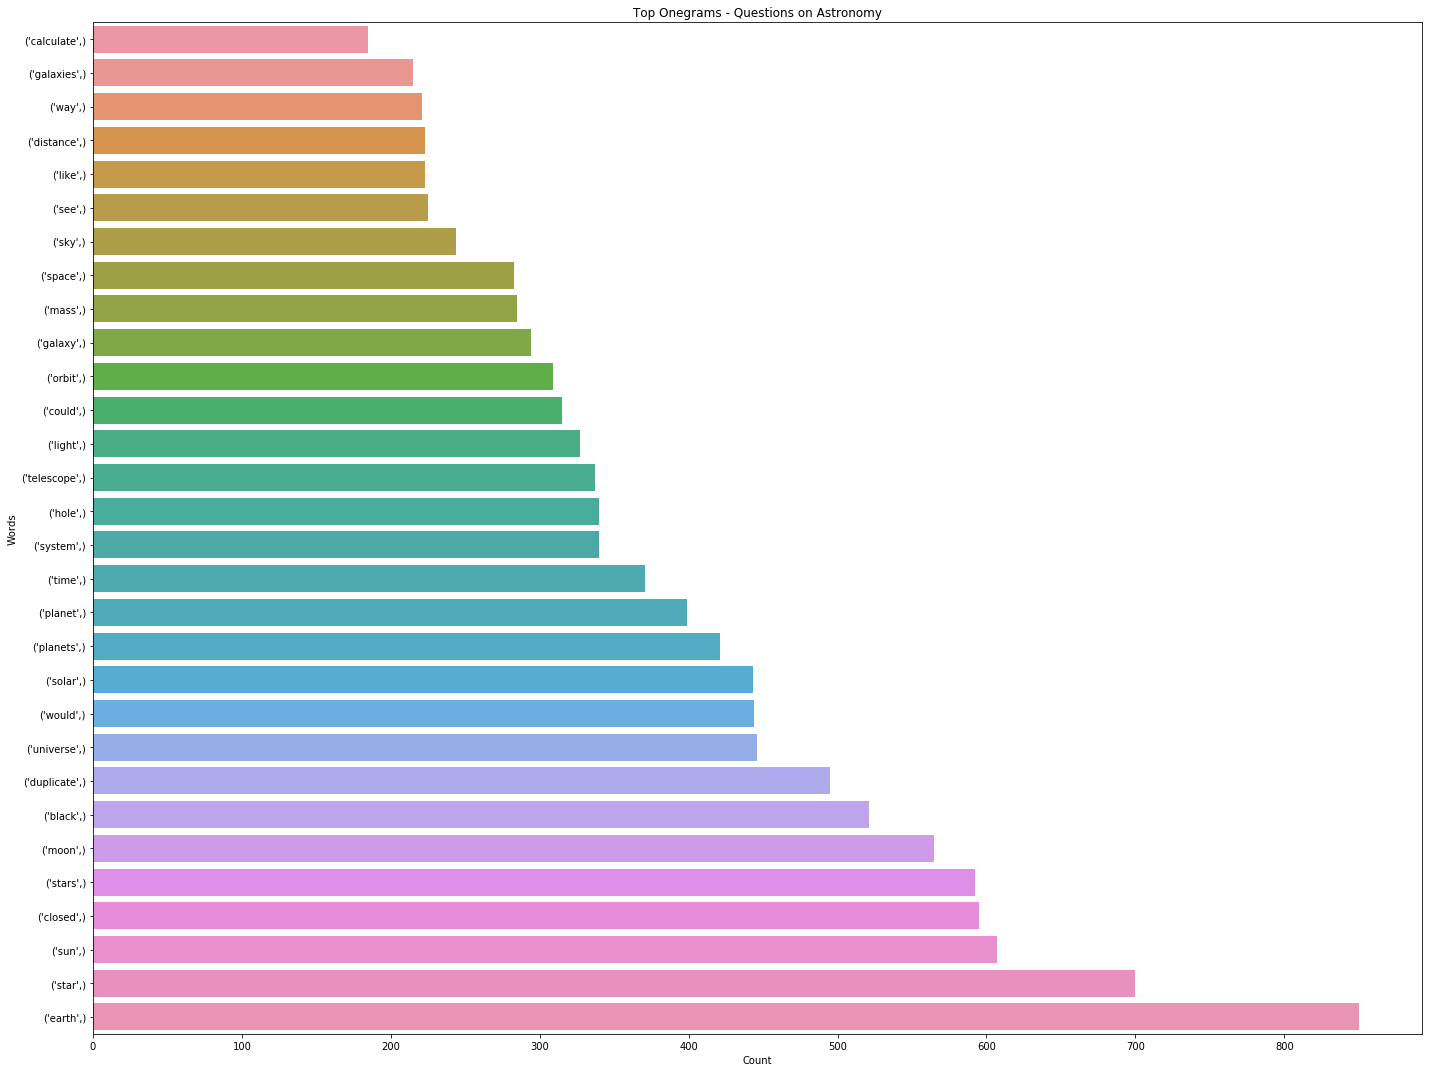

In [31]:
def plot_horizontal_bar(data, title):
    plt.figure(figsize=(20, 15))
    freq = pd.DataFrame(sorted(data.items(), key=lambda x: x[1]), columns=['Words','Count'])
    sns.barplot(x='Count', y='Words', data=freq.sort_values(by="Count", ascending=True).tail(30))
    plt.title(title)
    plt.tight_layout()
    plt.show()
    
plot_horizontal_bar(onegram_tags_freq, 'Top Onegrams - Questions on Astronomy')

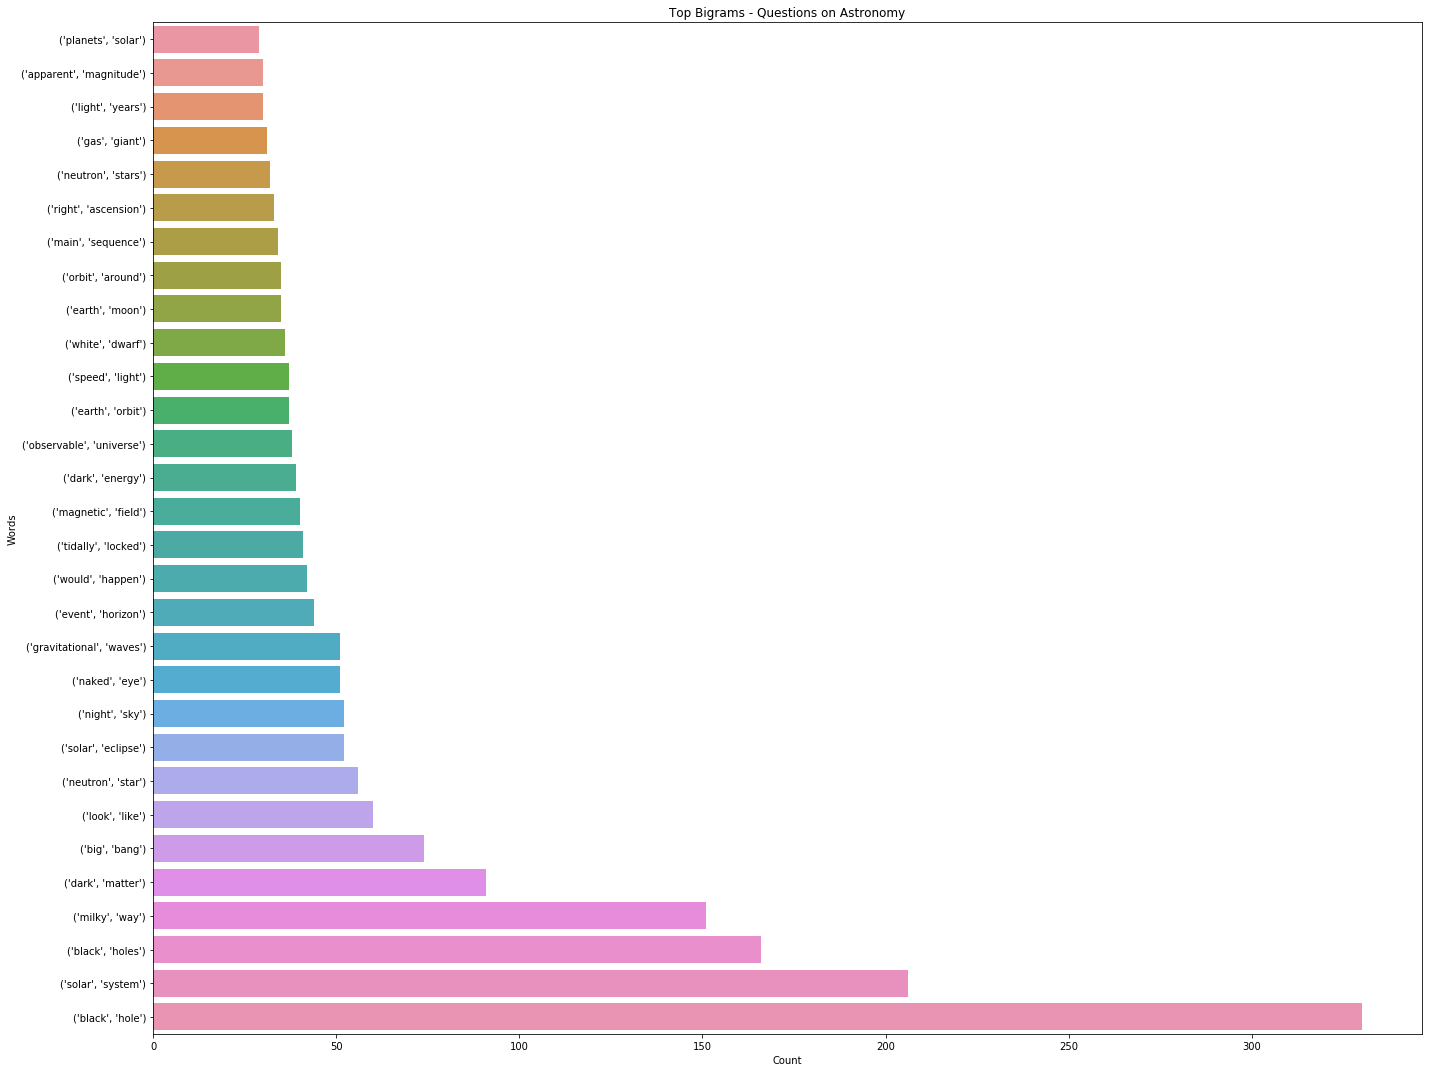

In [29]:
bigrams_tags_freq = defaultdict(int)
for sentence in df1['Questions']:
    for word in build_ngrams(sentence, 2):
        bigrams_tags_freq[word] = bigrams_tags_freq[word] + 1
        
plot_horizontal_bar(bigrams_tags_freq, 'Top Bigrams - Questions on Astronomy')

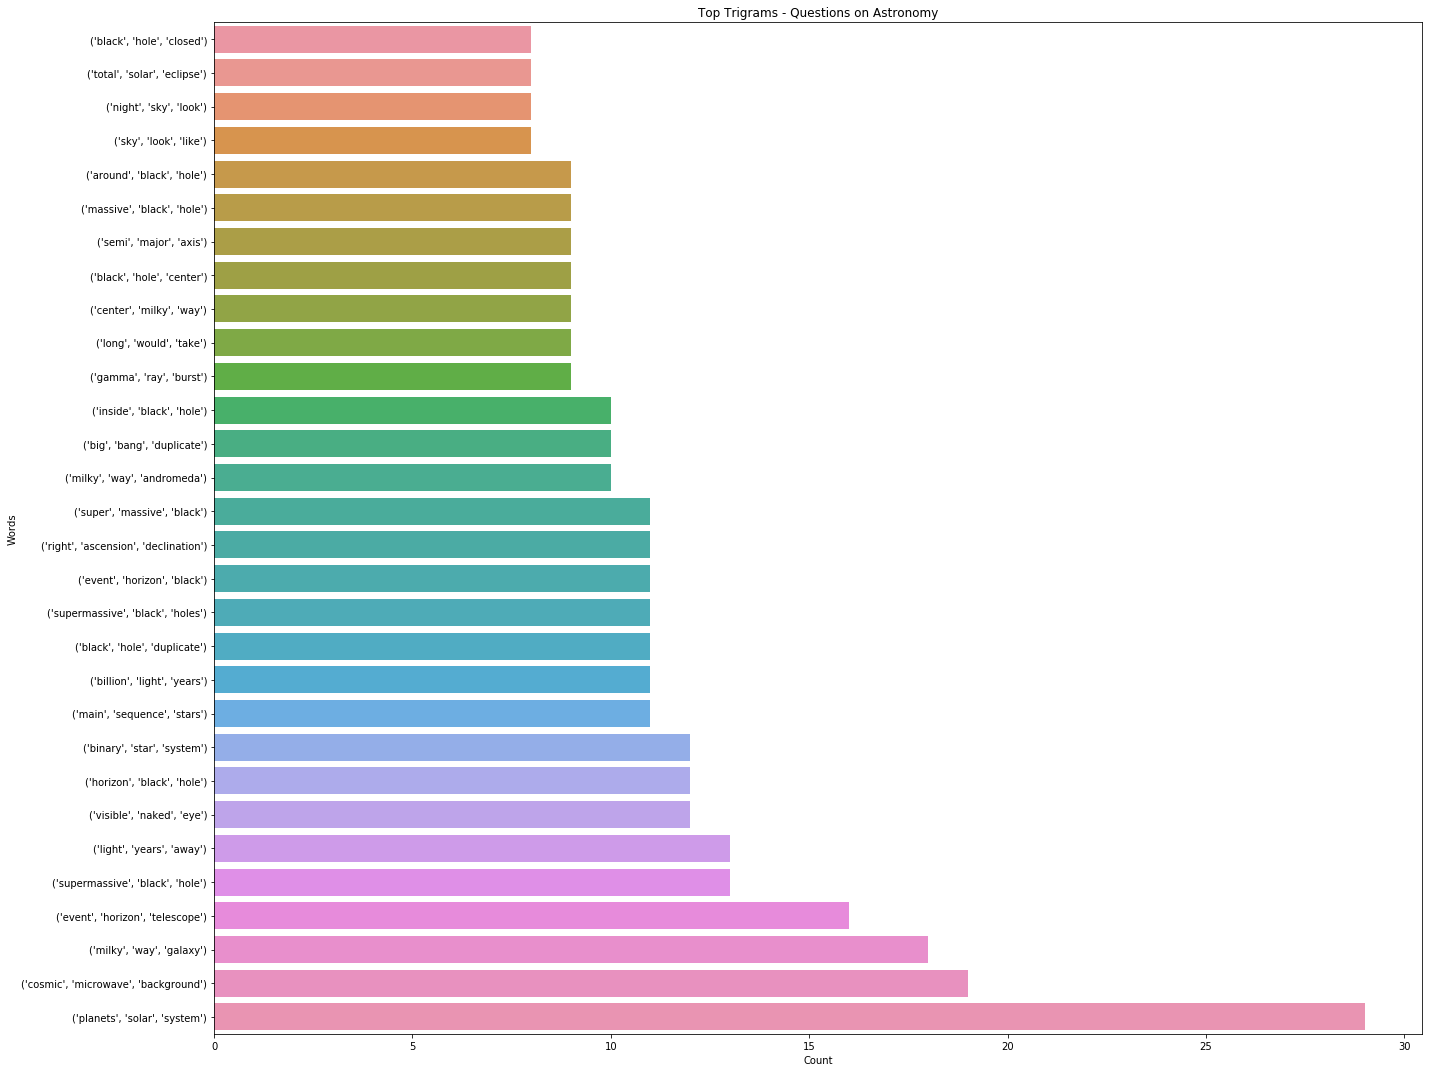

In [32]:
trigrams_tags_freq = defaultdict(int)
for sentence in df1['Questions']:
    for word in build_ngrams(sentence, 3):
        trigrams_tags_freq[word] = trigrams_tags_freq[word] + 1
plot_horizontal_bar(trigrams_tags_freq, 'Top Trigrams - Questions on Astronomy')

# **Data Preprocessing**

In [33]:
# Removing special characters, hyperlinks/URL's from the Questions.

df1['Questions'] = df1['Questions'].str.replace(';','').str.replace(':','').str.replace('/',' or ').str.replace('(','').str.replace(')','').str.replace('[','').str.replace(']','').str.replace('"','').str.replace("'",'').str.replace('.','')

In [34]:
df1["Tags"] = [item.replace("|", " __label__") for item in df1["Tags"]]
df1['Tags'] ='__label__' + df1['Tags'].astype(str)
df1.head()

,Questions,Tags
2,How to calculate the distance between 2 galaxi...,__label__observational-astronomy __label__astr...
3,Could not slow neutrinos orbit galaxies and cl...,__label__dark-matter __label__neutrinos
4,Are ocean water planets at Mars atmospheric pr...,__label__planet __label__water __label__planet...
5,Unit problem regards to proton,__label__astrophysics __label__units
6,Throwing a baseball from orbit to the earth,__label__orbit __label__orbital-mechanics __la...


In [35]:
columns_titles = ["Tags","Questions"]
df1=df1.reindex(columns=columns_titles)
df1.head()

,Tags,Questions
2,__label__observational-astronomy __label__astr...,How to calculate the distance between 2 galaxi...
3,__label__dark-matter __label__neutrinos,Could not slow neutrinos orbit galaxies and cl...
4,__label__planet __label__water __label__planet...,Are ocean water planets at Mars atmospheric pr...
5,__label__astrophysics __label__units,Unit problem regards to proton
6,__label__orbit __label__orbital-mechanics __la...,Throwing a baseball from orbit to the earth


# **Writing a `.txt` file from our dataframe data**

In [36]:
f= open("astronomy_n.txt","w+") #open the file for writing
f.close() #finally closing the file 

In [37]:
df1.to_csv(r'astronomy_n.txt', header=None, index=None, sep=' ', mode='a')

In [38]:
with open('astronomy_n.txt', 'r') as f, open('astronomy.txt', 'w') as fo:
    for line in f:
        fo.write(line.replace('"', '').replace("'", ""))

# **Splitting the `astronomy.txt` file into Training and Validation for fastText**

In [39]:
!head astronomy.txt

__label__observational-astronomy __label__astrophysics __label__distances How to calculate the distance between 2 galaxies given RA, DEC and light years from Earth duplicate
__label__dark-matter __label__neutrinos Could not slow neutrinos orbit galaxies and clusters, thus comprising a large component of even COLD dark matter?
__label__planet __label__water __label__planetary-science Are ocean water planets at Mars atmospheric pressure possible?
__label__astrophysics __label__units Unit problem regards to proton
__label__orbit __label__orbital-mechanics __label__satellite Throwing a baseball from orbit to the earth
__label__star-formation How can you tell the rough phase of star formation a star is in from the current radius and mass of the star?
__label__positional-astronomy Confused about the significance of sidereal time
__label__celestial-mechanics __label__skyfield Discrepancy between my results of Great Conjunction 2020 and Wikipedia
__label__telescope __label__apparen __label__ma

In [40]:
!wc astronomy.txt

    9800  125637 1102819 astronomy.txt


In [41]:
# Splitting the data into training and validation.

train_data= round(len(df1)*0.85)
validation_data = round(len(df1)*0.15) 

print("Number of records for training dataset are:", train_data)
print("Number of records for validation dataset are:", validation_data)

Number of records for training dataset are: 8330
Number of records for validation dataset are: 1470


In [42]:
training_data =pd.read_table("astronomy.txt", nrows=train_data,header=None,error_bad_lines=False,sep='\t')

valid_data =pd.read_table("astronomy.txt",skiprows=train_data,nrows=validation_data,
                          header=None,error_bad_lines=False,sep='\t')

In [43]:
# Saving the training and validation files.

np.savetxt('astronomy.train', training_data.values, fmt='%s', delimiter='\t')
np.savetxt('astronomy.val', valid_data.values, fmt='%s', delimiter='\t')

### **Training Data**

In [44]:
print(training_data.head())
print(len(training_data))

                                                   0
0  __label__observational-astronomy __label__astr...
1  __label__dark-matter __label__neutrinos Could ...
2  __label__planet __label__water __label__planet...
3  __label__astrophysics __label__units Unit prob...
4  __label__orbit __label__orbital-mechanics __la...
8330


### **Validation Data**

In [45]:
print(valid_data.head())
print(len(valid_data))

                                                   0
0  __label__telescope __label__amateur-observing ...
1  __label__orbit __label__solar-system __label__...
2  __label__planet __label__telescope __label__ne...
3  __label__astrophysics How would Jupiters brigh...
4  __label__solar-eclipse __label__lunar-eclipse ...
1470


# **Applying FastText on `astronomy.txt` file**

In [46]:
pip install fasttext

Note: you may need to restart the kernel to use updated packages.


In [47]:
import fasttext

### **Training our first model**

In [48]:
model_1 = fasttext.train_supervised(input="astronomy.train")

In [49]:
model_1.test("astronomy.val")

(1470, 0.12789115646258503, 0.056253740275284264)

### As we can see that when the passed the train data to the fastText Model without pre-processing, the model gave a precision of 13%.

## making model better & processed

In [50]:
cat astronomy.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > astronomy_preprocessed.txt

In [51]:
!wc astronomy_preprocessed.txt

    9800  133974 1119334 astronomy_preprocessed.txt


In [52]:
training_data =pd.read_table("astronomy_preprocessed.txt", nrows=train_data,header=None,error_bad_lines=False,sep='\t')

valid_data =pd.read_table("astronomy_preprocessed.txt",skiprows=train_data,nrows=validation_data,
                          header=None,error_bad_lines=False,sep='\t')

In [53]:
# Saving the training and validation files.
np.savetxt('astronomy_preprocessed.train', training_data.values, fmt='%s', delimiter='\t')
np.savetxt('astronomy_preprocessed.val', valid_data.values, fmt='%s', delimiter='\t')

### **Now, training our second model with preprocessed astronomy data**

In [54]:
model_2 = fasttext.train_supervised(input="astronomy_preprocessed.train")

In [55]:
model_2.test("astronomy_preprocessed.val")

(1470, 0.1619047619047619, 0.07121484141232795)

### As we can see from the model_2 output, pre-processing the data surged the precision around 4%. Now, we can tune in and apply hyper parameters to have a look how the model precision improves in the process.

### **Now, training our third model with 25 epochs**

In [56]:
model_3 = fasttext.train_supervised(input="astronomy_preprocessed.train", epoch=25)

In [57]:
model_3.test("astronomy_preprocessed.val")

(1470, 0.4891156462585034, 0.2151406343506882)

### As we can see from the model_3 output, the epochs increased the precision rapidly to 49% from 17%. Now, we'll add more hyper parameters to improve our model precision.

### **Now, training our fourth model with 25 epochs & learning rate**

In [58]:
model_4 = fasttext.train_supervised(input="astronomy_preprocessed.train", epoch=25, lr=0.3)

In [59]:
model_4.test("astronomy_preprocessed.val")

(1470, 0.5272108843537415, 0.23189706762417714)

### As we can see from the model_4 output, the learning rate also increased the precision by 4% from 49% to 53%. Now, we'll add more hyper parameters to improve our model precision.

### **Now, training our fifth model with 25 epochs, learning rate & word n-grams**

In [60]:
model_5 = fasttext.train_supervised(input="astronomy_preprocessed.train", epoch=25, lr=0.3, wordNgrams=2)

In [61]:
model_5.test("astronomy_preprocessed.val")

(1470, 0.5401360544217687, 0.23758228605625373)

### As we can see from the model_5 output, the precision didn't change. So, we'll not add word n-grams in our final model. Now, we'll add more hyper parameters to improve our model precision.

### **Now, training our sixth model with 25 epochs, learning rate & loss function**

In [62]:
model_6 = fasttext.train_supervised(input="astronomy_preprocessed.train", epoch=25, lr=0.3, loss='softmax', wordNgrams=2)

In [63]:
model_6.test("astronomy_preprocessed.val")

(1470, 0.535374149659864, 0.23548773189706762)

### As we can see from the model_6 output, the loss function slightly increased the precision. Now, we'll add more hyper parameters to improve our model precision.

### **Now, training our seventh model by scaling things up**

In [64]:
model_7 = fasttext.train_supervised(input="astronomy_preprocessed.train", lr=0.3, epoch=25, bucket=200000, dim=300, loss='softmax', wordNgrams=2)

In [65]:
model_7.test("astronomy_preprocessed.val")

(1470, 0.5292517006802722, 0.23279473369239975)

### Therefore, our final models with optimal precision and recall is `model_5`.

## **Creating a dataframe of the results which contains the type of model fitted and the Precision and Recall achieved with that Model fit.**

In [66]:
Results = {"Model Type" : ['Model_Unprocessed','Model_PreProcessed','Model_PreProcessed_epochs','Model_PreProcessed_epochs_lr',
                        'Model_PreProcessed_epochs_lr_wordng','Model_PreProcessed_epochs_lr_loss','Model_PreProcessed_scaling_up'],
        "Precision": [model_1.test("astronomy.val")[1],model_2.test("astronomy_preprocessed.val")[1], model_3.test("astronomy_preprocessed.val")[1],model_4.test("astronomy_preprocessed.val")[1],model_5.test("astronomy_preprocessed.val")[1],model_6.test("astronomy_preprocessed.val")[1],model_7.test("astronomy_preprocessed.val")[1]],
        "Recall":[model_1.test("astronomy.val")[2], model_2.test("astronomy_preprocessed.val")[2],model_3.test("astronomy_preprocessed.val")[2],model_4.test("astronomy_preprocessed.val")[2],model_5.test("astronomy_preprocessed.val")[2],model_6.test("astronomy_preprocessed.val")[2],model_7.test("astronomy_preprocessed.val")[2]]}

Results_df = pd.DataFrame(Results)
Results_df

,Model Type,Precision,Recall
0,Model_Unprocessed,0.127891,0.056254
1,Model_PreProcessed,0.161905,0.071215
2,Model_PreProcessed_epochs,0.489116,0.215141
3,Model_PreProcessed_epochs_lr,0.527211,0.231897
4,Model_PreProcessed_epochs_lr_wordng,0.540136,0.237582
5,Model_PreProcessed_epochs_lr_loss,0.535374,0.235488
6,Model_PreProcessed_scaling_up,0.529252,0.232795


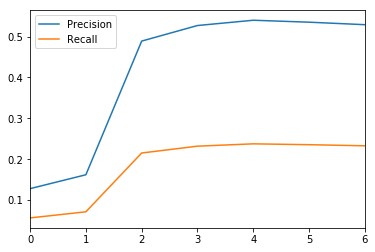

In [67]:
lines = Results_df.plot.line()

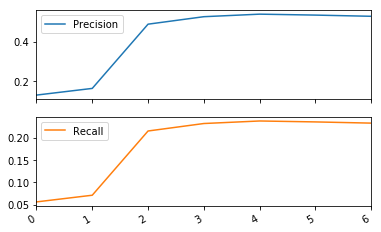

In [68]:
axes = Results_df.plot.line(subplots=True)

# **Therefore, we noticed a significant rise in the precision of our `model_3` and after that we tried some hyperparameters to achieve an accuracy of 54%.**